In [89]:
## Data from 
# https://archive.ics.uci.edu/dataset/109/wine

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
wine_metrics = wine.data.features 
wine_cluster = wine.data.targets 

In [90]:
## checking the wine data
wine_metrics.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Here we already have clusters of the dataset, but just take only the input data and try to make clustering 

In [91]:
## Standardising the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [105]:
## Here we are using whole data, because we can only categorise the data, can't test it
import numpy as np
import pandas as pd

cols = wine_metrics.columns.to_list()

wine_metrics[cols] = scaler.fit_transform(wine_metrics[cols])
wine_metrics_df = pd.DataFrame(np.round(wine_metrics, 2), columns=wine_metrics.columns)
wine_metrics_df.head()

wine_metrics_df = wine_metrics_df[['Alcohol','Nonflavanoid_phenols']]

/var/folders/qc/g56cp0qs4jd5bwzs5949y_b00000gn/T/ipykernel_29995/3214233279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_metrics[cols] = scaler.fit_transform(wine_metrics[cols])


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

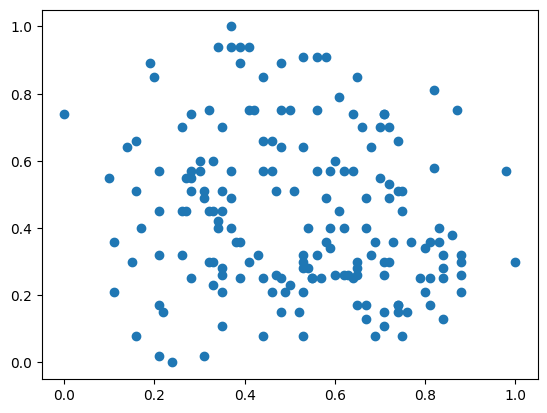

In [123]:
plt.scatter(wine_metrics_df.Alcohol,wine_metrics_df.Nonflavanoid_phenols)
plt.show()

In [124]:
sample_centers = wine_metrics_df.sample(n=3).values.tolist()
sample_centers

[[0.46, 0.57], [0.28, 0.25], [0.21, 0.17]]

In [127]:
## Gradient Descent
import importlib

import kmeans

# reload the whole module
importlib.reload(kmeans)

from kmeans import Kmeans

kmeans_algo = Kmeans(n_clusters = 3, data = wine_metrics_df)

kmeans_algo.initialise_centers(sample_centers)

centers,clusters = kmeans_algo.assign_clusters()

5


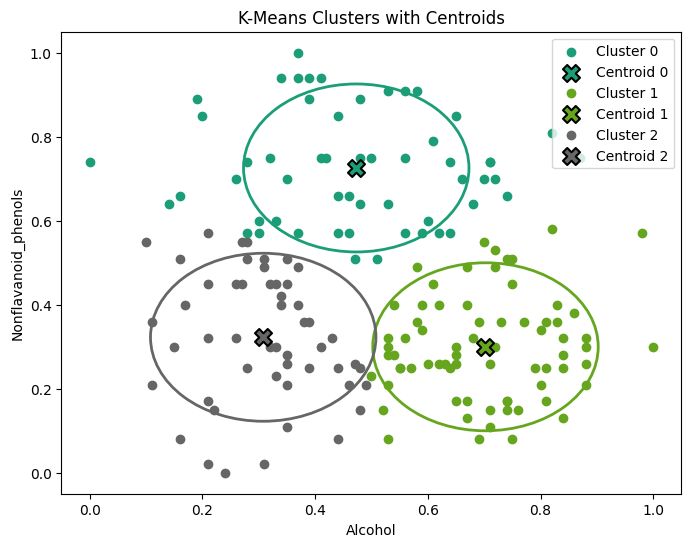

In [128]:
plt.figure(figsize=(8,6))
# Unique clusters and colors
unique_clusters = np.unique(clusters)
colors_dark = plt.cm.Dark2(np.linspace(0, 1, len(unique_clusters))) 

# Plot clusters and centroids
for idx, cluster in enumerate(unique_clusters):
    mask = clusters == cluster
    cluster_points = wine_metrics_df[mask]
    
    # Scatter points (lighter color)
    plt.scatter(
        cluster_points['Alcohol'], 
        cluster_points['Nonflavanoid_phenols'], 
        color=colors_dark[idx], 
        label=f'Cluster {cluster}'
    )
    
    # Plot centroid with cross marker and darker color
    plt.scatter(
        centers[idx, 0], 
        centers[idx, 1], 
        color=colors_dark[idx], 
        marker='X', 
        s=150,  # size of cross
        edgecolor='black', 
        linewidth=1.5, 
        label=f'Centroid {cluster}'
    )
    # Draw a circle around centroid
    circle = plt.Circle(
        (centers[idx, 0], centers[idx, 1]), 
        radius=0.2, 
        color=colors_dark[idx], 
        fill=False, 
        lw=2
    )
    plt.gca().add_patch(circle)

plt.xlabel('Alcohol')
plt.ylabel('Nonflavanoid_phenols')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.show()